Import libraries and load data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
import sklearn.metrics as metrics

In [3]:
from google.colab import files
upload = files.upload()

Saving HR_Analytics.csv to HR_Analytics.csv


In [4]:
emp=pd.read_csv('HR_Analytics.csv')

In [5]:
emp.keys()

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [6]:
emp.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


Handling Missing values (if any)

In [7]:
emp.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [8]:
emp=emp.drop(['EmployeeCount','StandardHours'], axis=1)

In [9]:
from sklearn.preprocessing import LabelEncoder
LbEn = LabelEncoder()
emp["Attrition"] = LbEn.fit_transform(emp["Attrition"])
emp.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,...,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,...,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,...,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,...,3,4,1,6,3,3,2,2,2,2


In [10]:
emp.head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,...,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,...,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,...,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,...,3,4,1,6,3,3,2,2,2,2


Exploratory Data Analysis and Visualization

<ipython-input-11-3411f41a2fe9>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = emp.corr()
<ipython-input-11-3411f41a2fe9>:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(corr,mask=np.zeros_like(corr,dtype=np.bool),cmap = sns.diverging_palette(220,10,as_cmap=True),square = True,ax=ax,annot=True)


<Axes: >

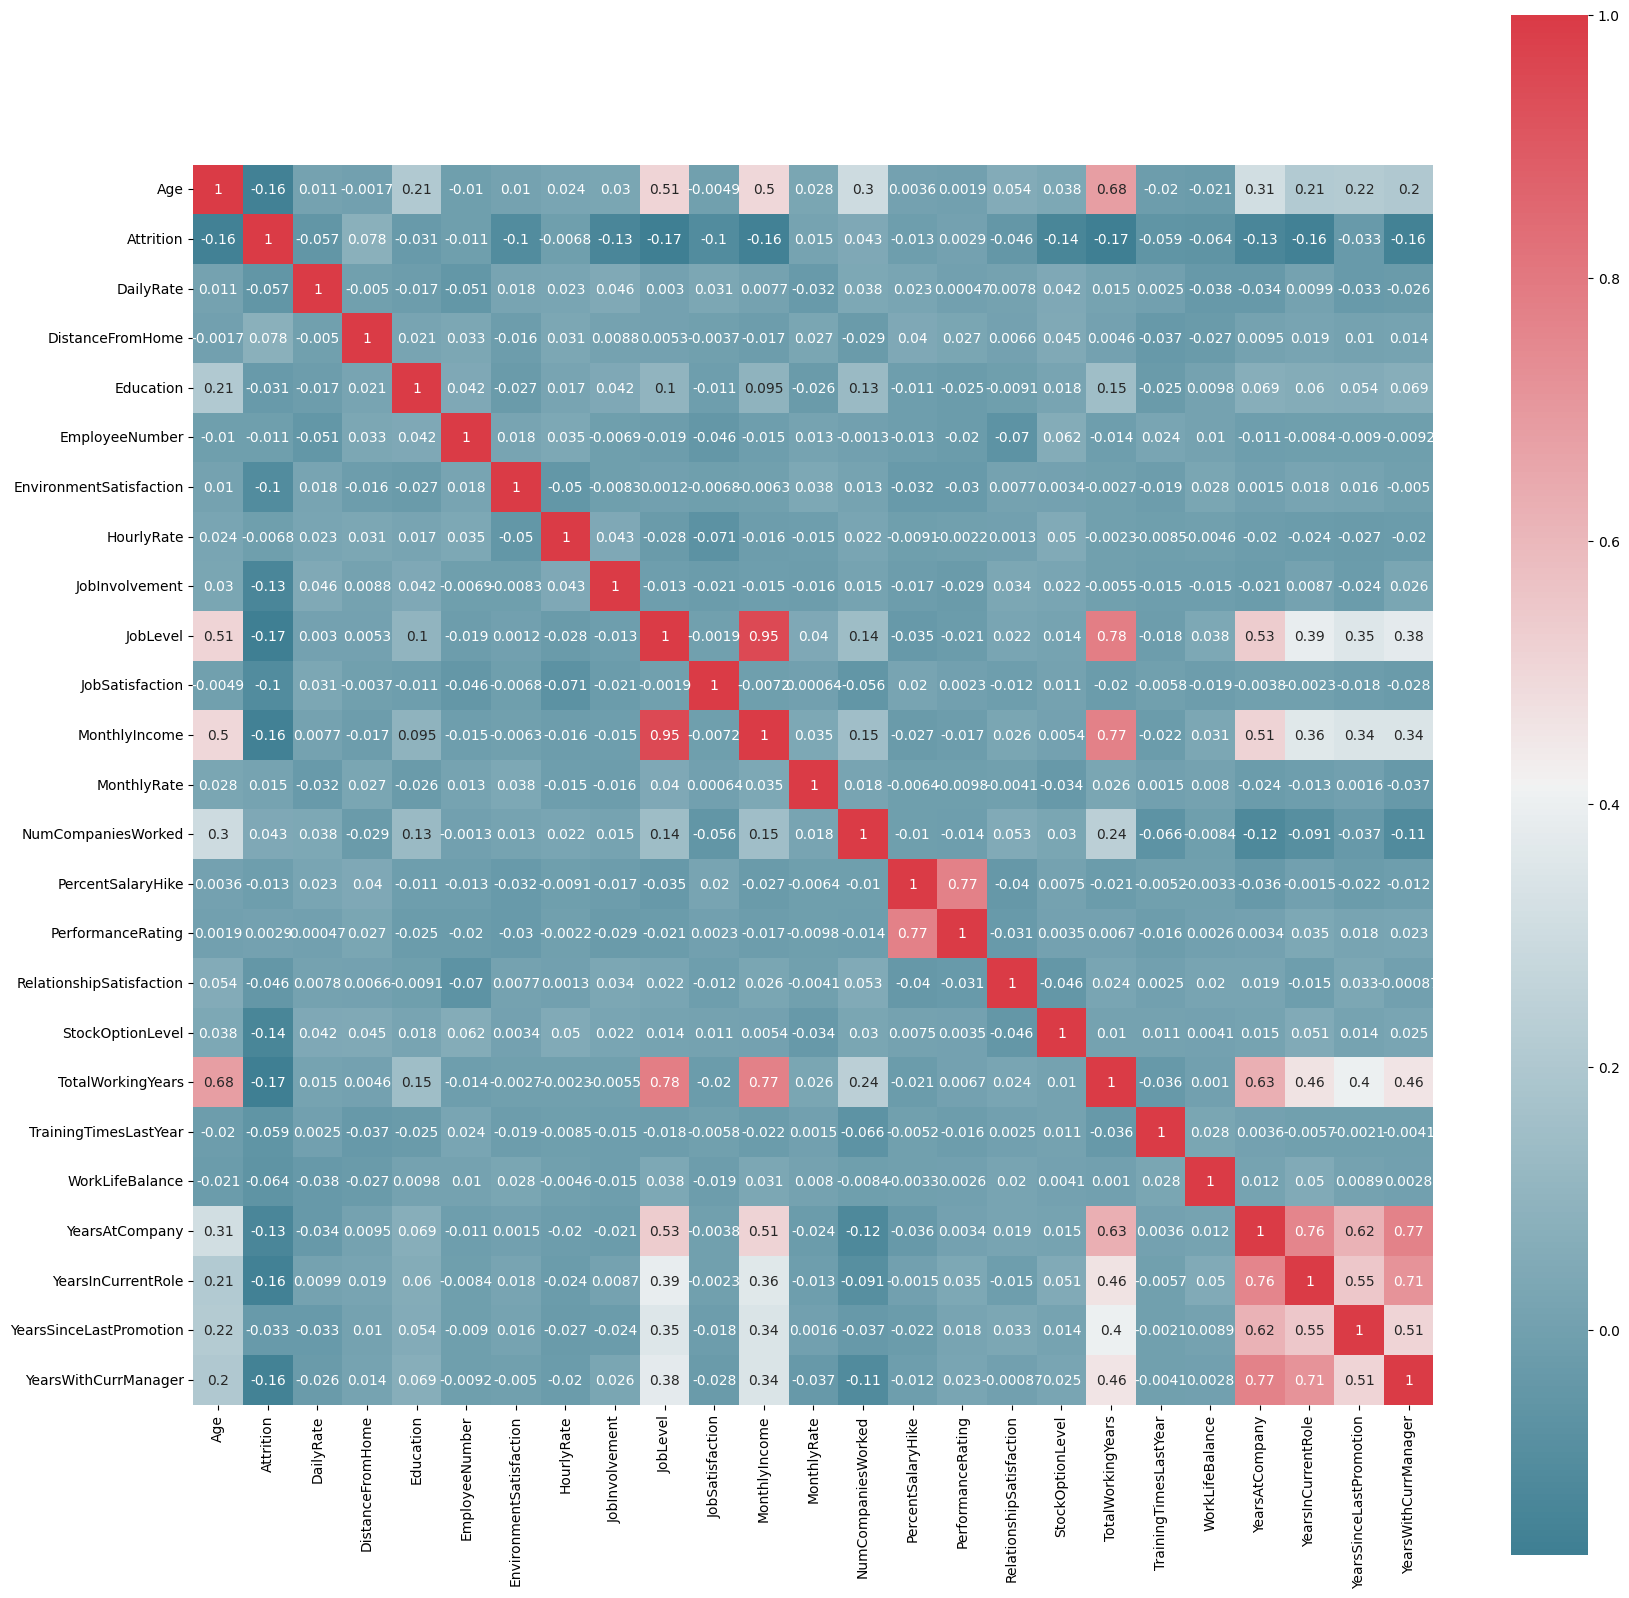

In [11]:
f, ax = plt.subplots(figsize=(20,20))
corr = emp.corr()
sns.heatmap(corr,mask=np.zeros_like(corr,dtype=np.bool),cmap = sns.diverging_palette(220,10,as_cmap=True),square = True,ax=ax,annot=True)


In [12]:
emp=emp.drop(['DailyRate','HourlyRate','MonthlyRate'], axis=1)

In [13]:
emp.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,Sales,1,2,Life Sciences,1,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,Research & Development,8,1,Life Sciences,2,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,Research & Development,2,2,Other,4,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,Research & Development,3,4,Life Sciences,5,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,Research & Development,2,1,Medical,7,1,Male,...,3,4,1,6,3,3,2,2,2,2


1. Plotting Age and Attrition

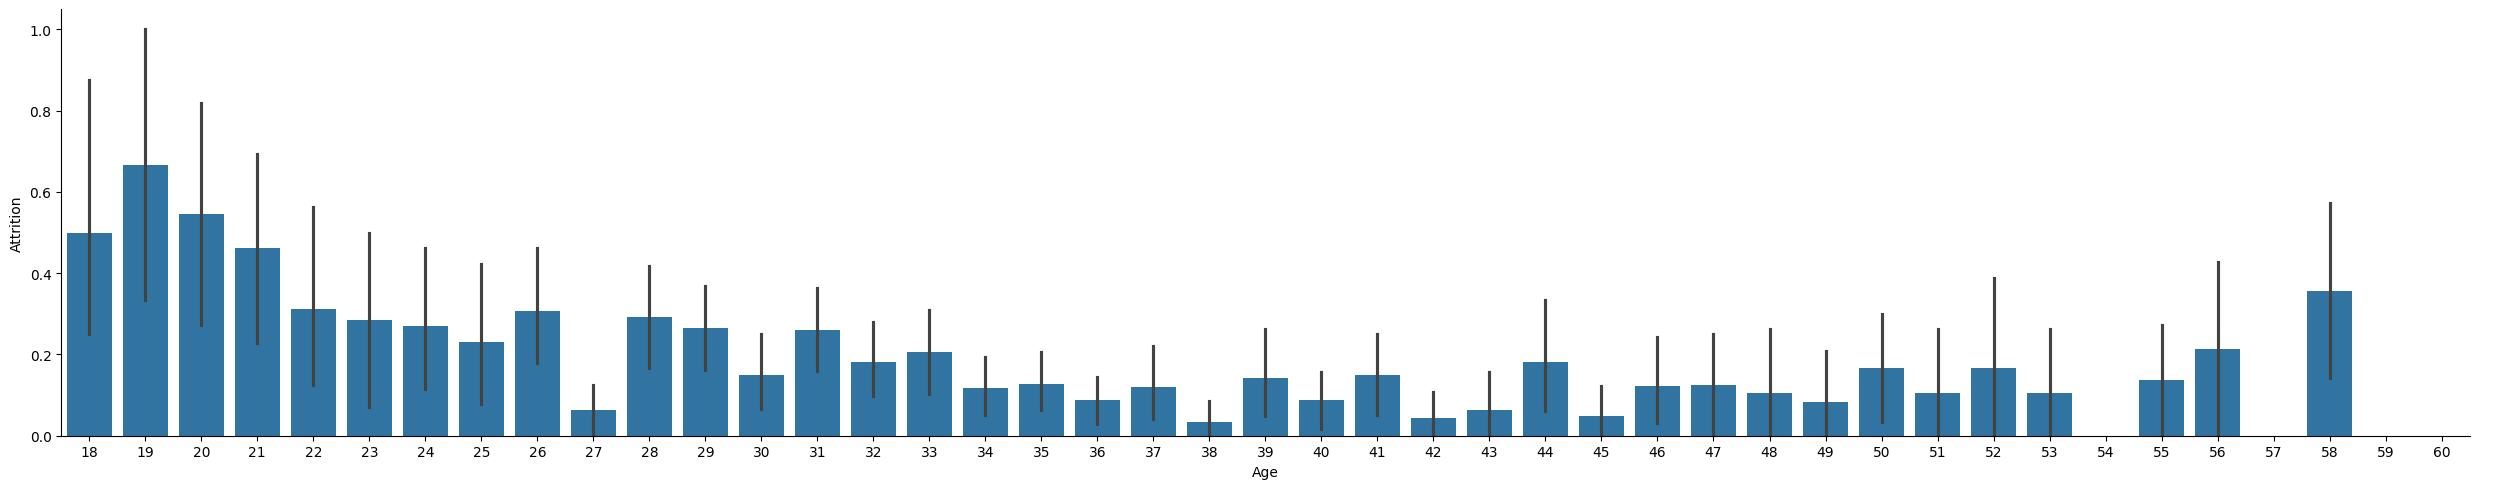

In [14]:
sns.catplot(x = "Age", y = "Attrition", aspect = 5,kind = 'bar',data = emp)
plt.show()

Younger people tend to have higher attrition rate

2.Department and Attrition

Text(0.5, 1.0, 'Attrition w.r.t Department')

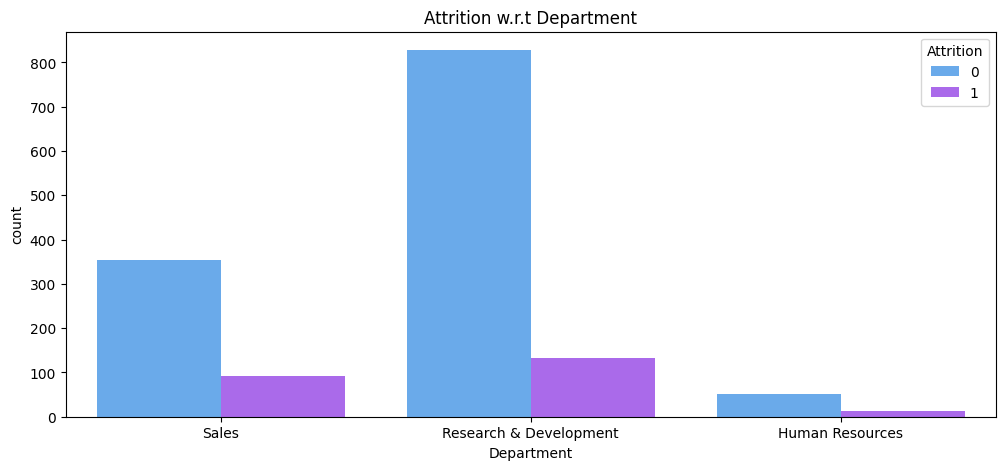

In [15]:

plt.figure(figsize=(12,5))
sns.countplot(x='Department', hue='Attrition',data=emp, palette='cool')
plt.title("Attrition w.r.t Department")

4. Plotting Job Role and Attrition

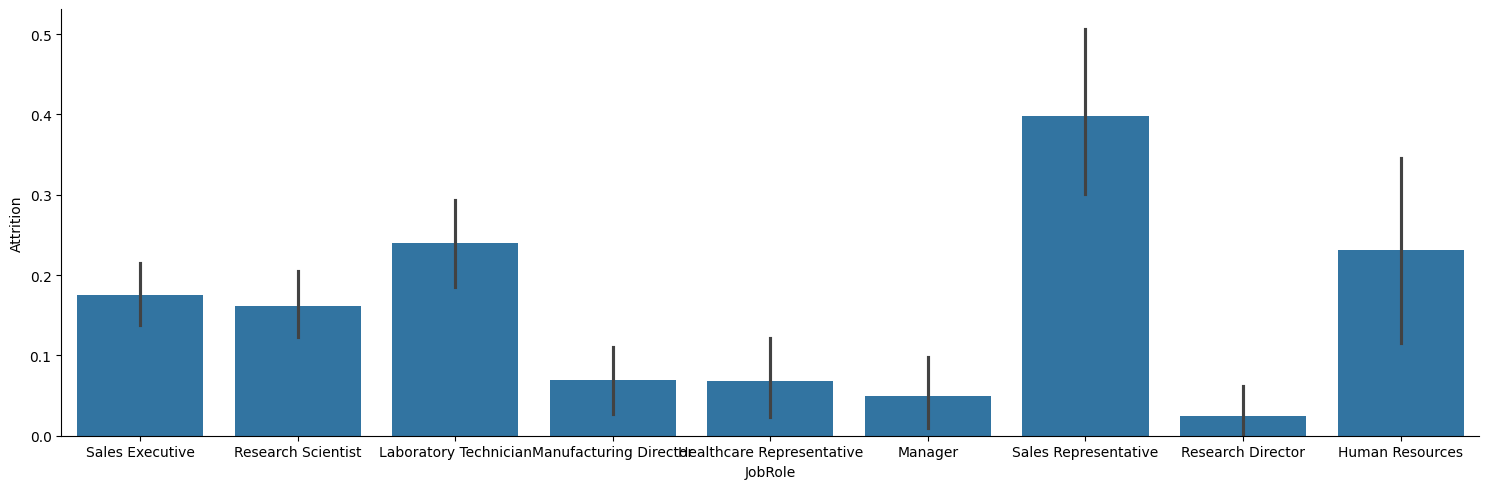

In [16]:

sns.catplot(x = "JobRole", y = "Attrition", aspect = 3,kind = 'bar',data = emp)
plt.show()


The job role with the least attrition is of a ResearchDirector and the one with maximum attrition is of a Sales Representative

5. Plotting years at Company and Attrition

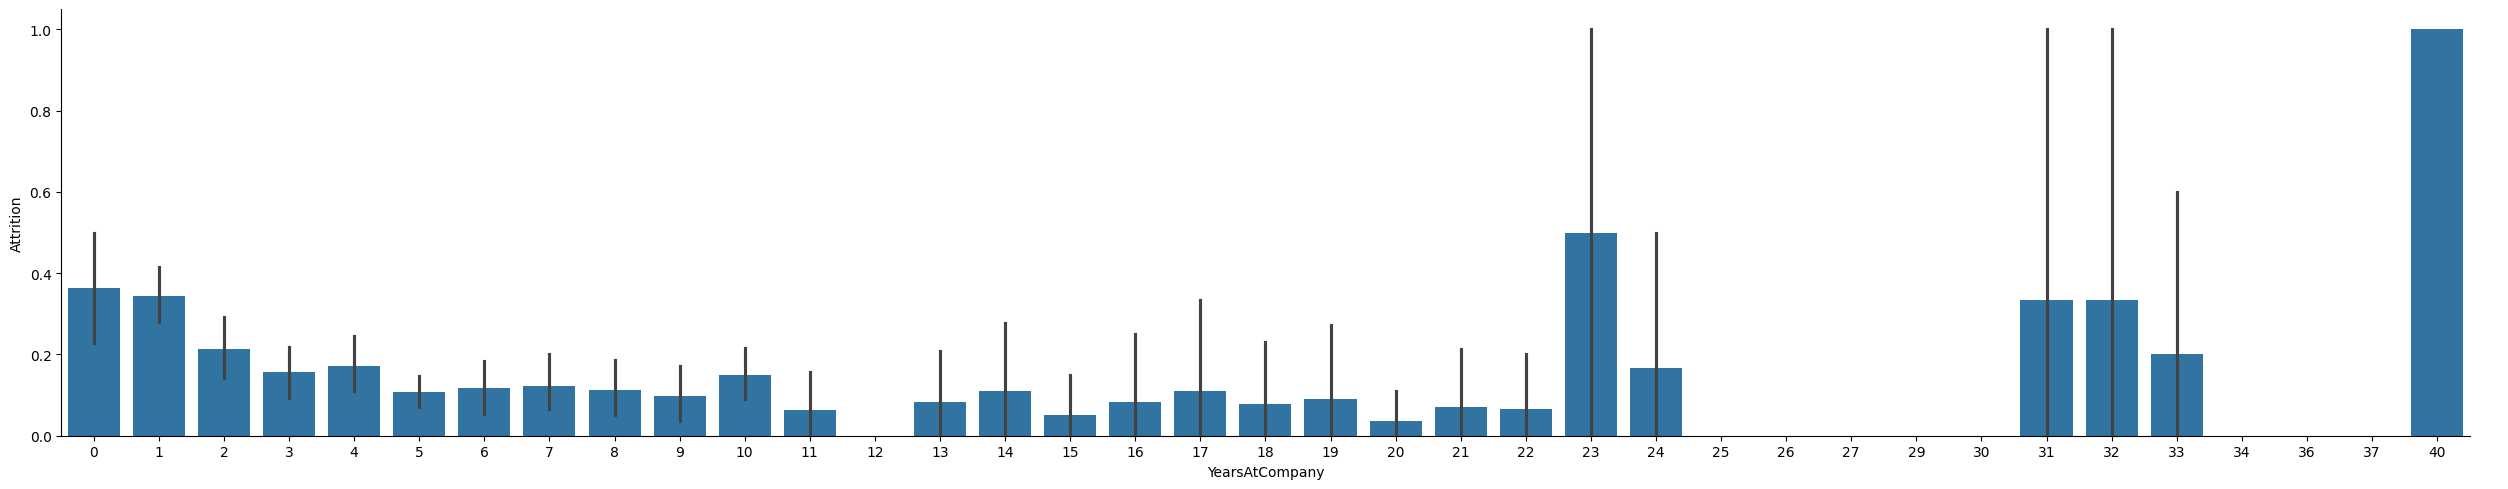

In [17]:
sns.catplot(x = "YearsAtCompany", y = "Attrition", aspect = 5,kind = 'bar',data = emp)
plt.show()

6.Plotting Environment Satisfaction and Attrition

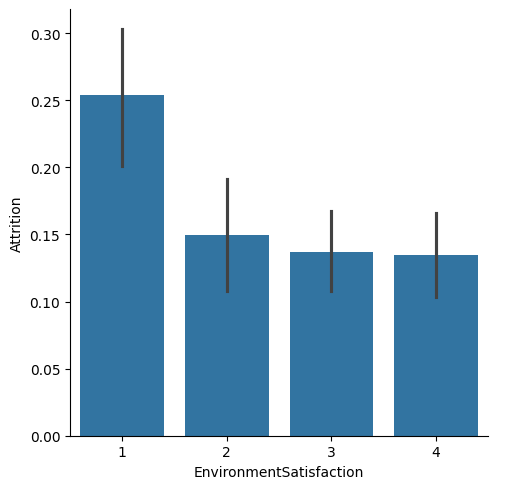

In [18]:
sns.catplot(x = "EnvironmentSatisfaction", y = "Attrition", aspect = 1,kind = 'bar',data = emp)
plt.show()

People having low environment satisfaction tend to have higher attrition rate.

7. Plotting OverTime and Attrition

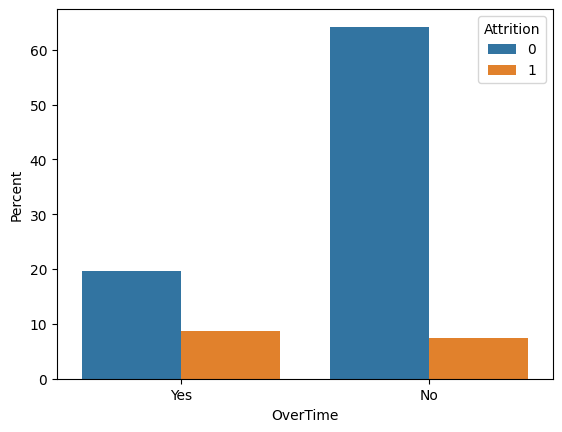

In [19]:
ax = sns.barplot(x="OverTime", y="MonthlyIncome", hue="Attrition", data=emp, estimator=lambda x: len(x) / len(emp) * 100)
ax.set(ylabel="Percent")
plt.show()

People who overtime have a higher chances of leaving the organization.

8. Plotting Monthly Income and Attrition

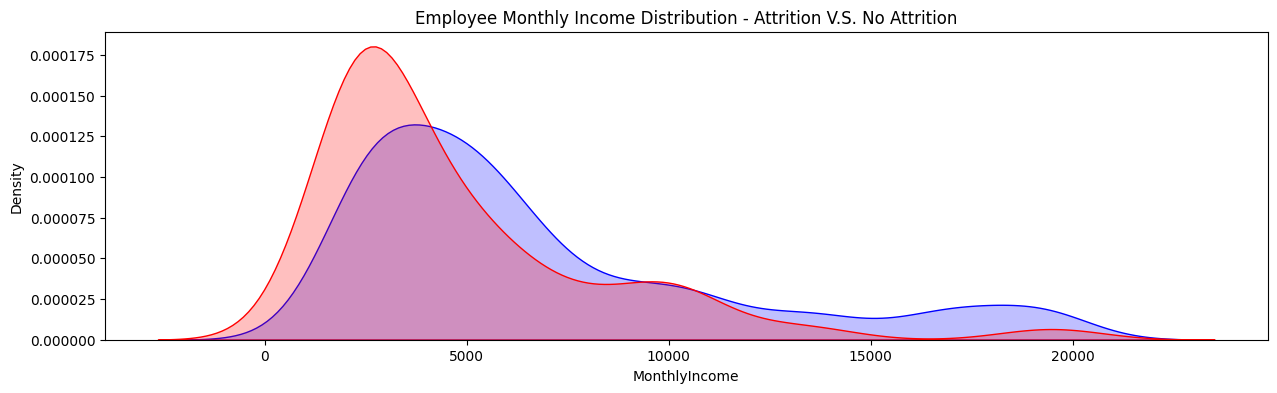

In [20]:
fig = plt.figure(figsize=(15,4))
ax=sns.kdeplot(emp.loc[(emp['Attrition'] == 0),'MonthlyIncome'] , color='b',fill=True, label='No Attrition')
ax=sns.kdeplot(emp.loc[(emp['Attrition'] == 1),'MonthlyIncome'] , color='r',fill=True, label='Attrition')
plt.title('Employee Monthly Income Distribution - Attrition V.S. No Attrition')
plt.show()

People with lower monthly income have a higher attrition rate.

PREPROCESSING


Converting Categorical to numerical

In [21]:
emp=pd.get_dummies(data=emp, columns=['BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','Over18','OverTime'],drop_first=True)
emp.head()

,Age,Attrition,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,41,1,1,2,1,2,3,2,4,5993,...,0,0,0,0,0,1,0,0,1,1
1,49,0,8,1,2,3,2,2,2,5130,...,0,0,0,0,1,0,0,1,0,0
2,37,1,2,2,4,4,2,1,3,2090,...,1,0,0,0,0,0,0,0,1,1
3,33,0,3,4,5,4,3,1,3,2909,...,0,0,0,0,1,0,0,1,0,1
4,27,0,2,1,7,1,3,1,2,3468,...,1,0,0,0,0,0,0,1,0,0


In [22]:
emp.keys()

Index(['Age', 'Attrition', 'DistanceFromHome', 'Education', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Life Sciences', 'EducationField_Marketing',
       'EducationField_Medical', 'EducationField_Other',
       'EducationField_Technical Degree', 'Gender_Male',
       'JobRole_Human Resources', 'JobRole_Laboratory Technician',
       'JobRole_Manager', 'JobRole_Manufacturing Director',
       'JobRole_Research Director', 'JobRole_Research Scientist',
      

In [23]:
X=emp.iloc[:, emp.columns!='Attrition']
X.head()

,Age,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,41,1,2,1,2,3,2,4,5993,8,...,0,0,0,0,0,1,0,0,1,1
1,49,8,1,2,3,2,2,2,5130,1,...,0,0,0,0,1,0,0,1,0,0
2,37,2,2,4,4,2,1,3,2090,6,...,1,0,0,0,0,0,0,0,1,1
3,33,3,4,5,4,3,1,3,2909,1,...,0,0,0,0,1,0,0,1,0,1
4,27,2,1,7,1,3,1,2,3468,9,...,1,0,0,0,0,0,0,1,0,0


In [24]:
y=emp.Attrition

In [25]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
X_train.shape, X_test.shape

((1176, 42), (294, 42))

Recursive Feature Elimination(RFE)

In [26]:
from sklearn.feature_selection import chi2
chi=chi2(X,y)

<Axes: >

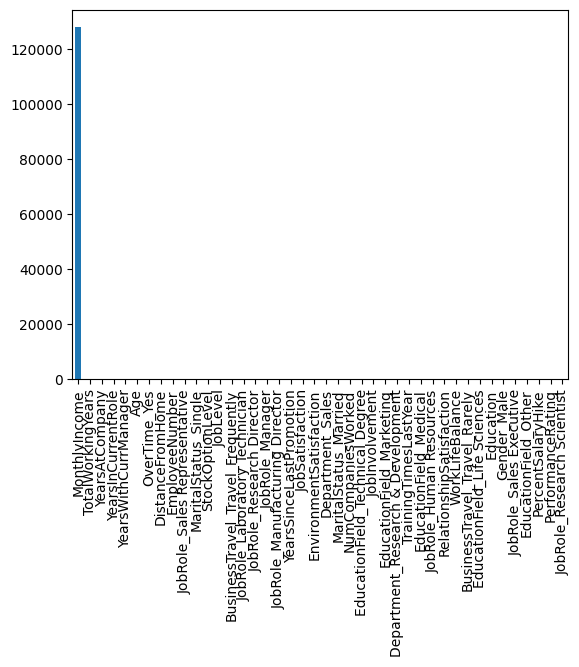

In [27]:
chi_values=pd.Series(chi[0],index=X.columns)
chi_values.sort_values(ascending=False,inplace=True)
chi_values.plot.bar()

In [28]:
from sklearn.feature_selection import RFE
rfe=RFE(estimator=RandomForestClassifier(),n_features_to_select=3)
rfe.fit(X,y)

RFE(estimator=RandomForestClassifier(), n_features_to_select=3)

In [29]:
for i,col in zip(range(X.shape[1]),X.columns):
  print(f"{col} selected={rfe.support_[i]} rank={rfe.ranking_[i]}")

Age selected=True rank=1
DistanceFromHome selected=False rank=2
Education selected=False rank=18
EmployeeNumber selected=True rank=1
EnvironmentSatisfaction selected=False rank=8
JobInvolvement selected=False rank=15
JobLevel selected=False rank=19
JobSatisfaction selected=False rank=13
MonthlyIncome selected=True rank=1
NumCompaniesWorked selected=False rank=6
PercentSalaryHike selected=False rank=5
PerformanceRating selected=False rank=35
RelationshipSatisfaction selected=False rank=16
StockOptionLevel selected=False rank=12
TotalWorkingYears selected=False rank=3
TrainingTimesLastYear selected=False rank=10
WorkLifeBalance selected=False rank=14
YearsAtCompany selected=False rank=4
YearsInCurrentRole selected=False rank=17
YearsSinceLastPromotion selected=False rank=11
YearsWithCurrManager selected=False rank=9
BusinessTravel_Travel_Frequently selected=False rank=20
BusinessTravel_Travel_Rarely selected=False rank=31
Department_Research & Development selected=False rank=22
Departmen

In [30]:
features=X.columns[rfe.get_support()]

In [31]:
features

Index(['Age', 'EmployeeNumber', 'MonthlyIncome'], dtype='object')

In [32]:
len(features)

3

In [33]:
from sklearn.ensemble import RandomForestClassifier


In [34]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)

RandomForestClassifier()

In [35]:
rf.feature_importances_

array([0.06741404, 0.05521563, 0.0258893 , 0.04948795, 0.03492241,
       0.02453051, 0.02012132, 0.03304765, 0.08026948, 0.03536629,
       0.03920283, 0.00547946, 0.0322013 , 0.02647826, 0.0492702 ,
       0.03095624, 0.02969872, 0.04304396, 0.02733369, 0.02761004,
       0.03577499, 0.01617764, 0.01029394, 0.01073715, 0.01098772,
       0.01003816, 0.00901381, 0.00901911, 0.00467879, 0.00985117,
       0.0110929 , 0.00518464, 0.00978046, 0.00168358, 0.00322901,
       0.0006792 , 0.00707651, 0.00991532, 0.00969976, 0.01129841,
       0.01539719, 0.05085128])

In [36]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
#accuracy on test data
X_test_prediction=rf.predict(X_test)
test_data_accuracy=accuracy_score(X_test_prediction,y_test)

In [37]:
print("accuracy:",test_data_accuracy)

accuracy: 0.8299319727891157


In [38]:
X_train = pd.DataFrame(X_train, columns = X.columns)

X_test = pd.DataFrame(X_test, columns=X.columns)

Text(0.5, 1.0, 'Feature Importance')

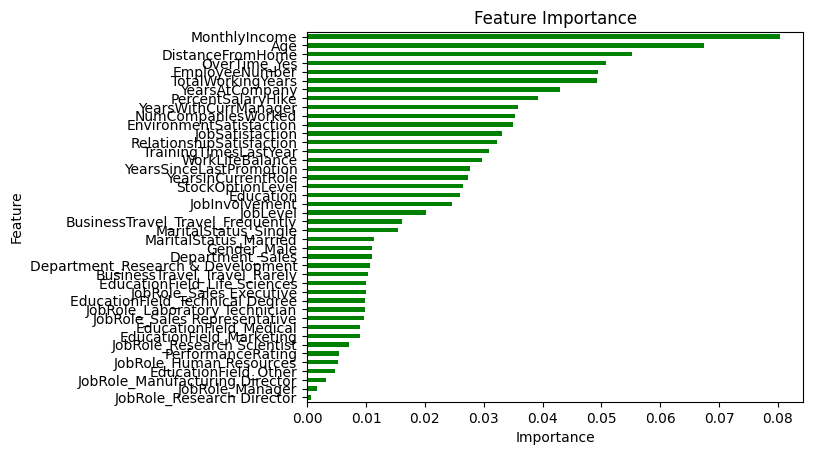

In [39]:
global_importances = pd.Series(rf.feature_importances_, index=X_train.columns)
global_importances.sort_values(ascending=True, inplace=True)
global_importances.plot.barh(color='green')
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance")


Logistic Regression

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler



model = LogisticRegression()
model.fit(X_train, y_train)
y_clf=model.predict(X_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
acc=accuracy_score(y_test,y_clf)
print(acc)
coefficients = model.coef_[0]
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
clf_report = classification_report(y_test,y_clf)
print(clf_report)

0.7959183673469388
              precision    recall  f1-score   support

           0       0.80      0.99      0.89       236
           1       0.00      0.00      0.00        58

    accuracy                           0.80       294
   macro avg       0.40      0.50      0.44       294
weighted avg       0.64      0.80      0.71       294



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<Axes: ylabel='Feature'>

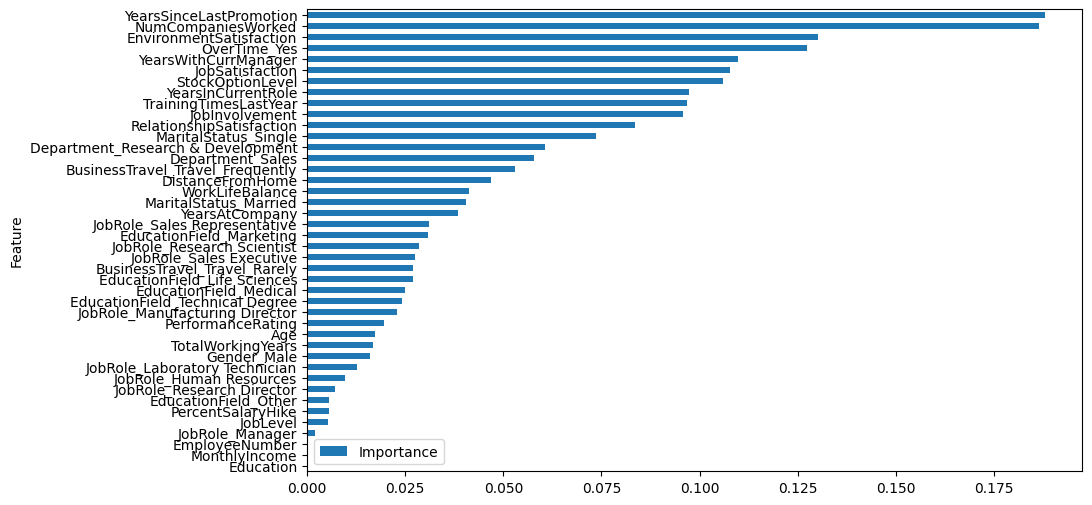

In [41]:
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': np.abs(coefficients)})
feature_importance = feature_importance.sort_values('Importance', ascending=True)
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6))

XGBoost Classifier

In [42]:
from xgboost import XGBClassifier

xgb_clf = XGBClassifier()
xgb_clf.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [43]:
print(xgb_clf)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)


In [44]:
from sklearn.metrics import accuracy_score

model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 85.37%


In [45]:
print(model.feature_importances_)

[0.02638733 0.02412127 0.02417785 0.01821558 0.03164817 0.02926326
 0.01579049 0.02004994 0.02875762 0.02153467 0.01491905 0.
 0.02748924 0.03892198 0.02530819 0.02108747 0.03226024 0.01906165
 0.02144936 0.01777057 0.02495607 0.03643079 0.02225796 0.01702909
 0.02172529 0.01943007 0.03438561 0.00872992 0.02813687 0.02987843
 0.01811949 0.         0.02421654 0.         0.         0.
 0.04253294 0.05369021 0.04462332 0.01751453 0.03275717 0.06537177]


In [46]:
from sklearn.metrics import classification_report,confusion_matrix

print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.86      0.97      0.91       236
           1       0.76      0.38      0.51        58

    accuracy                           0.85       294
   macro avg       0.81      0.67      0.71       294
weighted avg       0.84      0.85      0.83       294



In [47]:
emp.head()

,Age,Attrition,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,41,1,1,2,1,2,3,2,4,5993,...,0,0,0,0,0,1,0,0,1,1
1,49,0,8,1,2,3,2,2,2,5130,...,0,0,0,0,1,0,0,1,0,0
2,37,1,2,2,4,4,2,1,3,2090,...,1,0,0,0,0,0,0,0,1,1
3,33,0,3,4,5,4,3,1,3,2909,...,0,0,0,0,1,0,0,1,0,1
4,27,0,2,1,7,1,3,1,2,3468,...,1,0,0,0,0,0,0,1,0,0


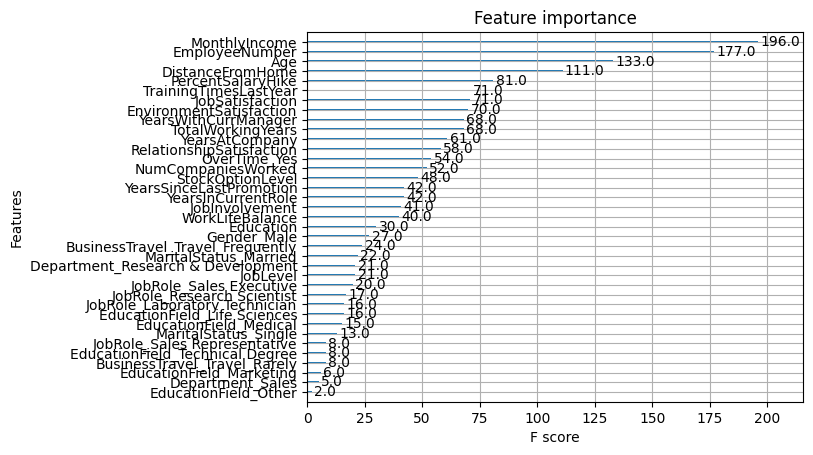

In [48]:
from xgboost import plot_importance
plot_importance(xgb_clf)
plt.show()

Age,EnvironmentSatisfaction,Department are the important features


In [ ]:
emp.isnull().sum()

Age                                  0
Attrition                            0
DistanceFromHome                     0
Education                            0
EmployeeNumber                       0
EnvironmentSatisfaction              0
JobInvolvement                       0
JobLevel                             0
JobSatisfaction                      0
MonthlyIncome                        0
NumCompaniesWorked                   0
PercentSalaryHike                    0
PerformanceRating                    0
RelationshipSatisfaction             0
StockOptionLevel                     0
TotalWorkingYears                    0
TrainingTimesLastYear                0
WorkLifeBalance                      0
YearsAtCompany                       0
YearsInCurrentRole                   0
YearsSinceLastPromotion              0
YearsWithCurrManager                 0
BusinessTravel_Travel_Frequently     0
BusinessTravel_Travel_Rarely         0
Department_Research & Development    0
Department_Sales         